In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [2]:
fh = open('adder.txt', 'r')
data1 = np.array([np.array(list(map(float, line.split()))) for line in fh.read().splitlines()])
fh.close()

In [3]:
V_th = data1[:, 0] + data1[:, 1] + data1[:, 2]
V_exp = data1[:, 3]
def lin(x, m, c):
    return m*x + c
popt1, pcov1 = curve_fit(lin, V_th, V_exp)
Vs = np.linspace(0, 10, 3)

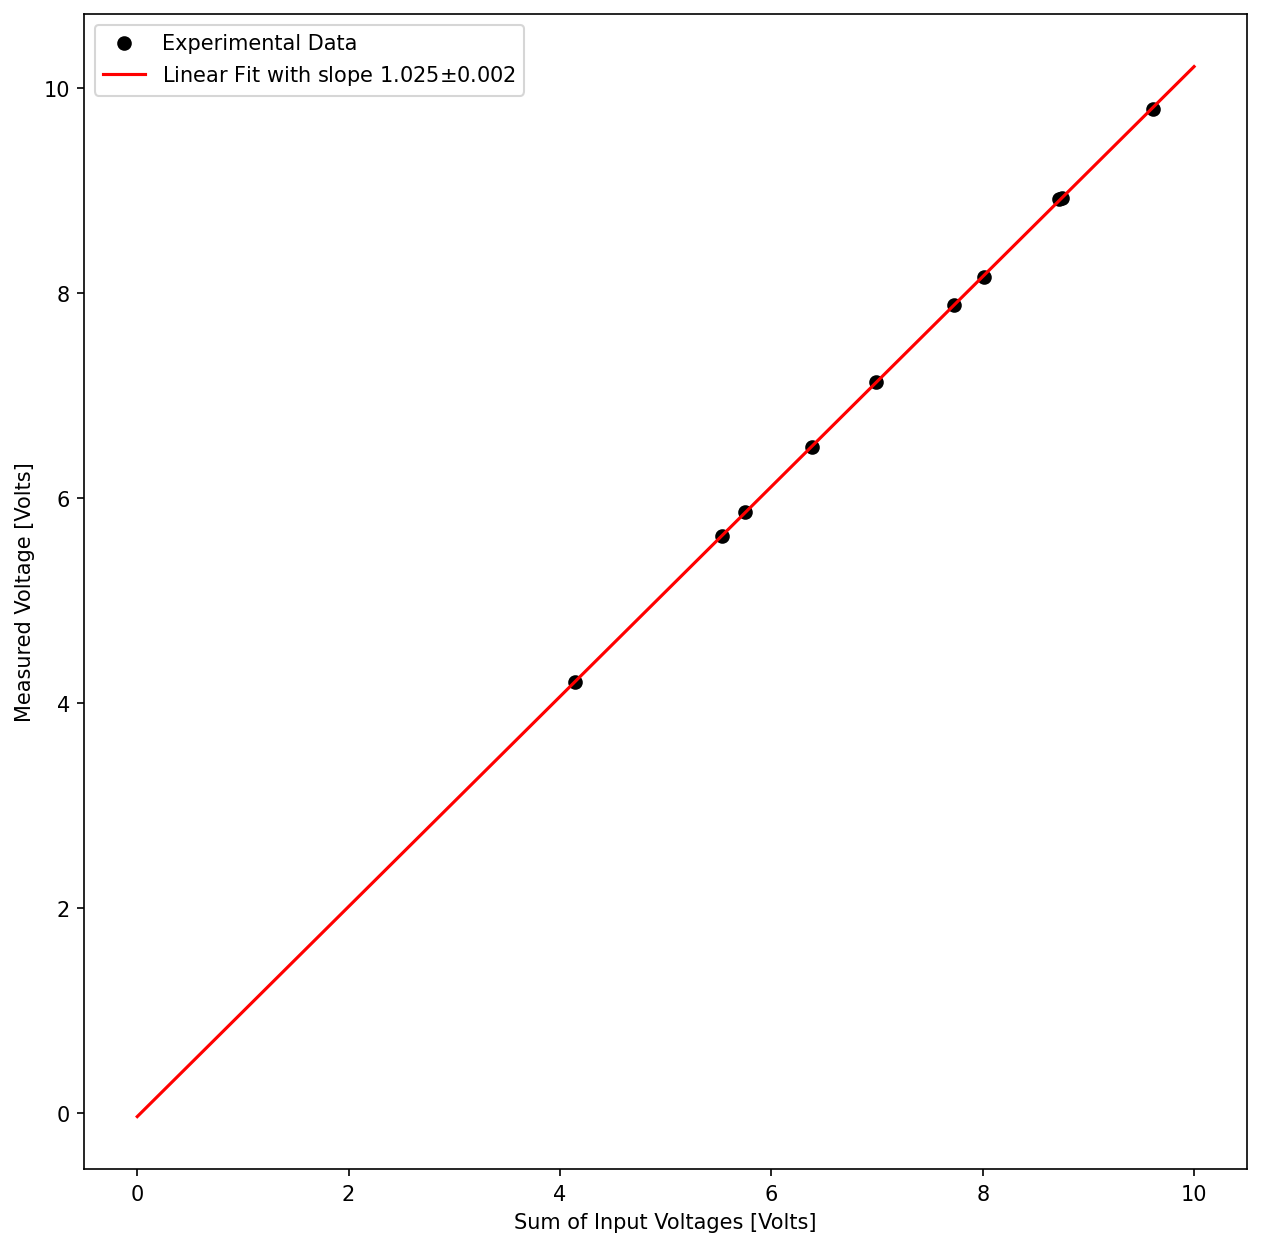

In [4]:
fig, ax = plt.subplots(1, 1, dpi=150, figsize=(10, 10))
ax.scatter(V_th, V_exp, color='k', label="Experimental Data")
ax.plot(Vs, lin(Vs, popt1[0], popt1[1]), 'r-', label=f"Linear Fit with slope {popt1[0]:.3f}"+r"$\pm$"+f"{np.sqrt(pcov1[0,0]):.3f}")
ax.set_ylabel("Measured Voltage [Volts]")
ax.set_xlabel("Sum of Input Voltages [Volts]")
ax.legend()
fig.savefig("adder_plot.png")

In [6]:
fh = open('subtractor.txt', 'r')
data2 = np.array([np.array(list(map(float, line.split()))) for line in fh.read().splitlines()])
fh.close()

In [7]:
V_th2 = data2[:, 1] - data2[:, 0]
V_exp2 = data2[:, 2]
def lin(x, m, c):
    return m*x + c
popt2, pcov2 = curve_fit(lin, V_th2, V_exp2)
Vs2 = np.linspace(-5, 8, 3)

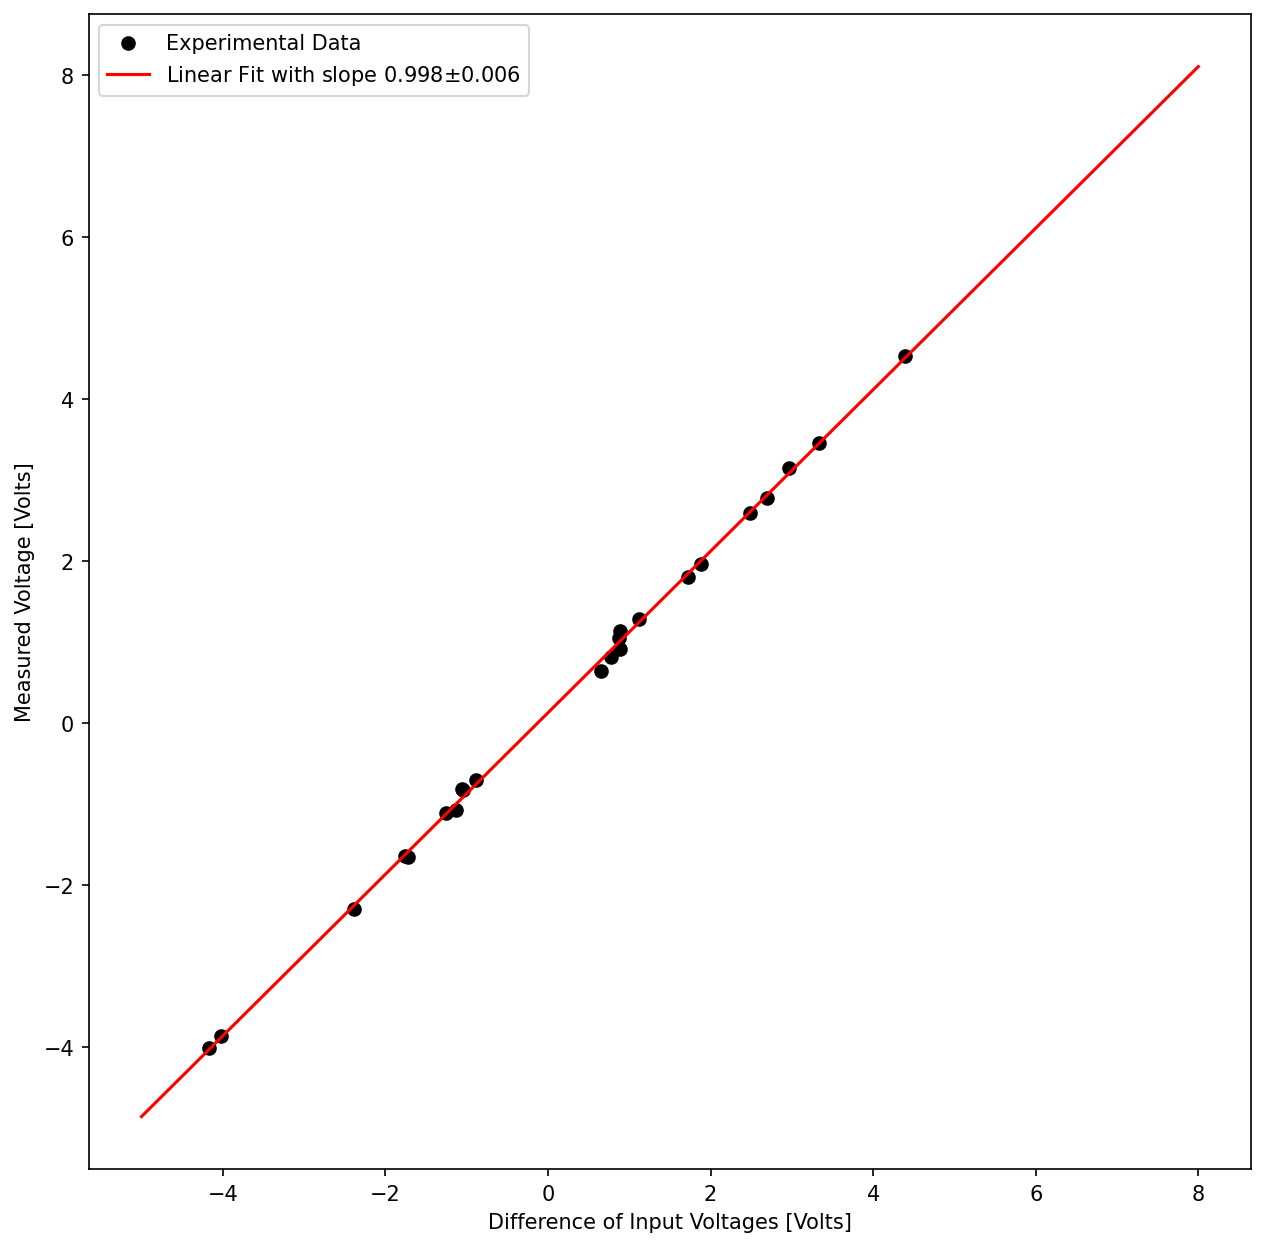

In [8]:
fig, ax = plt.subplots(1, 1, dpi=150, figsize=(10, 10))
ax.scatter(V_th2, V_exp2, color='k', label="Experimental Data")
ax.plot(Vs2, lin(Vs2, popt2[0], popt2[1]), 'r-', label=f"Linear Fit with slope {popt2[0]:.3f}"+r"$\pm$"+f"{np.sqrt(pcov2[0,0]):.3f}")
ax.set_ylabel("Measured Voltage [Volts]")
ax.set_xlabel("Difference of Input Voltages [Volts]")
ax.legend()
fig.savefig("subtractor_plot.png")